# Chapter 14: Categorical Predictors

Import the packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf
import seaborn as sns
from scipy import stats

## Two-level factor

Read in the data

In [2]:
sexab = pd.read_csv("data/sexab.csv", index_col=0)
sexab.head()

,cpa,ptsd,csa
1,2.04786,9.71365,Abused
2,0.83895,6.16933,Abused
3,-0.24139,15.15926,Abused
4,-1.11461,11.31277,Abused
5,2.01468,9.95384,Abused


Construct something similar to the `by` function summary from LMR.

In [3]:
lfuncs = ['min','median','max']
sexab.groupby('csa').agg({'cpa': lfuncs,'ptsd': lfuncs}).round(1)

cpa             ptsd             
           min median  max  min median   max
csa                                         
Abused    -1.1    2.6  8.6  6.0   11.3  19.0
NotAbused -3.1    1.3  5.0 -3.3    5.8  10.9

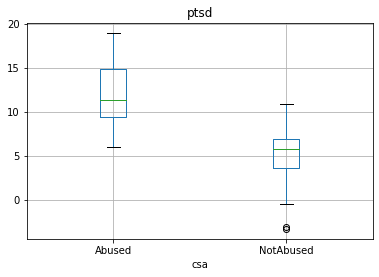

In [4]:
sexab.boxplot('ptsd',by='csa')
plt.suptitle("")
plt.show()

C:\Users\Diogo\Anaconda3\lib\site-packages\seaborn\axisgrid.py:2079: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


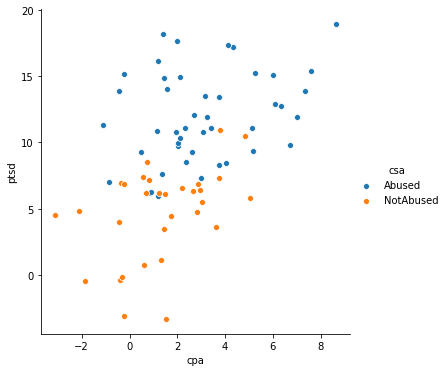

In [5]:
sns.pairplot(x_vars="cpa", y_vars="ptsd", data=sexab, hue="csa",size=5)
plt.show()

In [6]:
stats.ttest_ind(sexab.ptsd[sexab.csa == 'Abused'], sexab.ptsd[sexab.csa == 'NotAbused'])

Ttest_indResult(statistic=8.938657095668173, pvalue=2.1719334389283135e-13)

Define dummy variables and including an intercept does fit a model but the meaning of the coefficients and standard errors are problematic. Look out for the *design matrix is singular* warning at the end.

In [7]:
df1 = (sexab.csa == 'Abused').astype(int)
df2 = (sexab.csa == 'NotAbused').astype(int)
X = np.column_stack((df1,df2))
lmod = sm.OLS(sexab.ptsd,sm.add_constant(X)).fit()
lmod.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   ptsd   R-squared:                       0.519
Model:                            OLS   Adj. R-squared:                  0.513
Method:                 Least Squares   F-statistic:                     79.90
Date:                Tue, 23 Jun 2020   Prob (F-statistic):           2.17e-13
Time:                        16:59:42   Log-Likelihood:                -201.44
No. Observations:                  76   AIC:                             406.9
Df Residuals:                      74   BIC:                             411.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.5457      0.270     20.526      0.000       5.007       6.084
x1             6.3954      0.403     15.874      0.000       5.593       7.198
x2            -0.8498      0.450     -1.888      0.063      -1.747       0.047
==============================================================================
Omnibus:                        1.200   Durbin-Watson:                   1.830
Prob(Omnibus):                  0.549   Jarque-Bera (JB):                1.206
Skew:                          -0.198   Prob(JB):                        0.547
Kurtosis:                       2.527   Cond. No.                     9.34e+15
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.33e-30. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

Use only one of the dummy variables:

In [8]:
lmod = sm.OLS(sexab.ptsd,sm.add_constant(df2)).fit()
lmod.summary()

C:\Users\Diogo\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2542: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   ptsd   R-squared:                       0.519
Model:                            OLS   Adj. R-squared:                  0.513
Method:                 Least Squares   F-statistic:                     79.90
Date:                Tue, 23 Jun 2020   Prob (F-statistic):           2.17e-13
Time:                        16:59:42   Log-Likelihood:                -201.44
No. Observations:                  76   AIC:                             406.9
Df Residuals:                      74   BIC:                             411.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         11.9411      0.518     23.067      0.000      10.910      12.973
csa           -7.2452      0.811     -8.939      0.000      -8.860      -5.630
==============================================================================
Omnibus:                        1.200   Durbin-Watson:                   1.830
Prob(Omnibus):                  0.549   Jarque-Bera (JB):                1.206
Skew:                          -0.198   Prob(JB):                        0.547
Kurtosis:                       2.527   Cond. No.                         2.46
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Or we can just not have an intercept term:

In [9]:
lmod = sm.OLS(sexab.ptsd,X).fit()
lmod.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   ptsd   R-squared:                       0.519
Model:                            OLS   Adj. R-squared:                  0.513
Method:                 Least Squares   F-statistic:                     79.90
Date:                Tue, 23 Jun 2020   Prob (F-statistic):           2.17e-13
Time:                        16:59:42   Log-Likelihood:                -201.44
No. Observations:                  76   AIC:                             406.9
Df Residuals:                      74   BIC:                             411.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            11.9411      0.518     23.067      0.000      10.910      12.973
x2             4.6959      0.624      7.529      0.000       3.453       5.939
==============================================================================
Omnibus:                        1.200   Durbin-Watson:                   1.830
Prob(Omnibus):                  0.549   Jarque-Bera (JB):                1.206
Skew:                          -0.198   Prob(JB):                        0.547
Kurtosis:                       2.527   Cond. No.                         1.20
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Using the formula method produces R-like results

In [10]:
lmod = smf.ols('ptsd ~ csa', sexab).fit()
lmod.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   ptsd   R-squared:                       0.519
Model:                            OLS   Adj. R-squared:                  0.513
Method:                 Least Squares   F-statistic:                     79.90
Date:                Tue, 23 Jun 2020   Prob (F-statistic):           2.17e-13
Time:                        16:59:42   Log-Likelihood:                -201.44
No. Observations:                  76   AIC:                             406.9
Df Residuals:                      74   BIC:                             411.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           11.9411      0.518     23.067      0.000      10.910      12.973
csa[T.NotAbused]    -7.2452      0.811     -8.939      0.000      -8.860      -5.630
==============================================================================
Omnibus:                        1.200   Durbin-Watson:                   1.830
Prob(Omnibus):                  0.549   Jarque-Bera (JB):                1.206
Skew:                          -0.198   Prob(JB):                        0.547
Kurtosis:                       2.527   Cond. No.                         2.46
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Can view the design matrix: (picking out the first two rows of each level of csa).

In [11]:
import patsy
selcols = [0,1,45,46]
patsy.dmatrix('~ csa', sexab)[selcols,:]

array([[1., 0.],
       [1., 0.],
       [1., 1.],
       [1., 1.]])

Can check the types of variables:

In [12]:
sexab.csa.dtype, sexab.ptsd.dtype

(dtype('O'), dtype('float64'))

`pandas` has a way to create the dummy variables:

In [13]:
sac = pd.concat([sexab,pd.get_dummies(sexab.csa)],axis=1)
lmod = smf.ols('ptsd ~ Abused', sac).fit()
lmod.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   ptsd   R-squared:                       0.519
Model:                            OLS   Adj. R-squared:                  0.513
Method:                 Least Squares   F-statistic:                     79.90
Date:                Tue, 23 Jun 2020   Prob (F-statistic):           2.17e-13
Time:                        16:59:42   Log-Likelihood:                -201.44
No. Observations:                  76   AIC:                             406.9
Df Residuals:                      74   BIC:                             411.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      4.6959      0.624      7.529      0.000       3.453       5.939
Abused         7.2452      0.811      8.939      0.000       5.630       8.860
==============================================================================
Omnibus:                        1.200   Durbin-Watson:                   1.830
Prob(Omnibus):                  0.549   Jarque-Bera (JB):                1.206
Skew:                          -0.198   Prob(JB):                        0.547
Kurtosis:                       2.527   Cond. No.                         2.89
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Alternatively, we can set the reference level to NotAbused:

In [14]:
lmod = smf.ols('ptsd ~ C(csa,Treatment(reference="NotAbused"))', sexab).fit()
lmod.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   ptsd   R-squared:                       0.519
Model:                            OLS   Adj. R-squared:                  0.513
Method:                 Least Squares   F-statistic:                     79.90
Date:                Tue, 23 Jun 2020   Prob (F-statistic):           2.17e-13
Time:                        16:59:42   Log-Likelihood:                -201.44
No. Observations:                  76   AIC:                             406.9
Df Residuals:                      74   BIC:                             411.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
======================================================================================================================
                                                         coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------------
Intercept                                              4.6959      0.624      7.529      0.000       3.453       5.939
C(csa, Treatment(reference="NotAbused"))[T.Abused]     7.2452      0.811      8.939      0.000       5.630       8.860
==============================================================================
Omnibus:                        1.200   Durbin-Watson:                   1.830
Prob(Omnibus):                  0.549   Jarque-Bera (JB):                1.206
Skew:                          -0.198   Prob(JB):                        0.547
Kurtosis:                       2.527   Cond. No.                         2.89
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Factors and Quantitative predictors

In [15]:
lmod4 = smf.ols('ptsd ~ csa*cpa', sexab).fit()
lmod4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   ptsd   R-squared:                       0.583
Model:                            OLS   Adj. R-squared:                  0.565
Method:                 Least Squares   F-statistic:                     33.53
Date:                Tue, 23 Jun 2020   Prob (F-statistic):           1.13e-13
Time:                        16:59:42   Log-Likelihood:                -196.04
No. Observations:                  76   AIC:                             400.1
Df Residuals:                      72   BIC:                             409.4
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept               10.5571      0.806     13.094      0.000       8.950      12.164
csa[T.NotAbused]        -6.8612      1.075     -6.384      0.000      -9.004      -4.719
cpa                      0.4500      0.208      2.159      0.034       0.034       0.866
csa[T.NotAbused]:cpa     0.3140      0.368      0.852      0.397      -0.421       1.049
==============================================================================
Omnibus:                        1.273   Durbin-Watson:                   1.837
Prob(Omnibus):                  0.529   Jarque-Bera (JB):                1.083
Skew:                          -0.069   Prob(JB):                        0.582
Kurtosis:                       2.432   Cond. No.                         12.0
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Take a look at a chunk from the design matrix:

In [16]:
patsy.dmatrix('~ csa*cpa', sexab)[40:50,]

array([[ 1.     ,  0.     ,  3.0775 ,  0.     ],
       [ 1.     ,  0.     ,  5.26785,  0.     ],
       [ 1.     ,  0.     ,  3.41136,  0.     ],
       [ 1.     ,  0.     ,  1.35316,  0.     ],
       [ 1.     ,  0.     ,  5.11921,  0.     ],
       [ 1.     ,  1.     ,  1.49181,  1.49181],
       [ 1.     ,  1.     ,  0.60961,  0.60961],
       [ 1.     ,  1.     ,  1.43335,  1.43335],
       [ 1.     ,  1.     , -0.33664, -0.33664],
       [ 1.     ,  1.     , -3.12036, -3.12036]])

Plot the fit by group - seem like a lot of work!

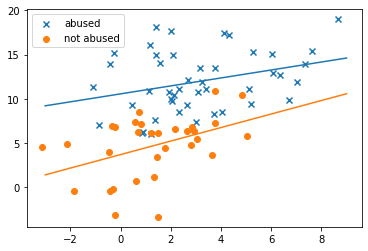

In [17]:
abused = (sexab.csa == "Abused")
plt.scatter(sexab.cpa[abused], sexab.ptsd[abused], marker='x',label="abused")
xl,xu = [-3, 9]
a, b = (lmod4.params[0], lmod4.params[2])
plt.plot([xl,xu], [a+xl*b,a+xu*b])
plt.scatter(sexab.cpa[~abused], sexab.ptsd[~abused], marker='o',label="not abused")
a, b = (lmod4.params[0]+lmod4.params[1], lmod4.params[2]+lmod4.params[3])
plt.plot([xl,xu], [a+xl*b,a+xu*b])
plt.legend()
plt.show()

Can produce essentially the same plot but the regression lines are fit independently to the groups. In this case, the fits will be identical.

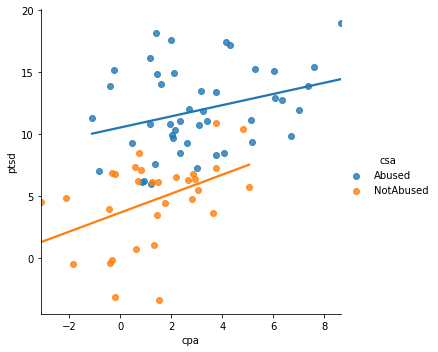

In [18]:
sns.lmplot(x="cpa", y="ptsd", hue="csa", data=sexab, ci=None)
plt.show()

In [19]:
lmod3 = smf.ols('ptsd ~ csa+cpa', sexab).fit()
lmod3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   ptsd   R-squared:                       0.579
Model:                            OLS   Adj. R-squared:                  0.567
Method:                 Least Squares   F-statistic:                     50.12
Date:                Tue, 23 Jun 2020   Prob (F-statistic):           2.00e-14
Time:                        16:59:43   Log-Likelihood:                -196.43
No. Observations:                  76   AIC:                             398.9
Df Residuals:                      73   BIC:                             405.8
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           10.2480      0.719     14.260      0.000       8.816      11.680
csa[T.NotAbused]    -6.2728      0.822     -7.632      0.000      -7.911      -4.635
cpa                  0.5506      0.172      3.209      0.002       0.209       0.893
==============================================================================
Omnibus:                        0.879   Durbin-Watson:                   1.860
Prob(Omnibus):                  0.644   Jarque-Bera (JB):                0.878
Skew:                          -0.070   Prob(JB):                        0.645
Kurtosis:                       2.492   Cond. No.                         9.14
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

No shortcut to producing the plot this time.

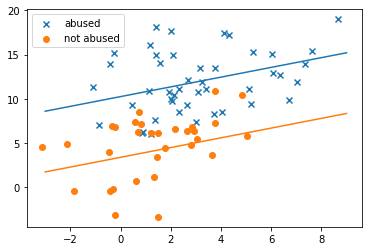

In [20]:
abused = (sexab.csa == "Abused")
plt.scatter(sexab.cpa[abused], sexab.ptsd[abused], marker='x',label="abused")
xl,xu = [-3, 9]
a, b = (lmod3.params[0], lmod3.params[2])
plt.plot([xl,xu], [a+xl*b,a+xu*b])
plt.scatter(sexab.cpa[~abused], sexab.ptsd[~abused], marker='o',label="not abused")
a, b = (lmod3.params[0]+lmod4.params[1], lmod3.params[2])
plt.plot([xl,xu], [a+xl*b,a+xu*b])
plt.legend()
plt.show()

Get the confidence intervals:

In [21]:
lmod3.conf_int()

,0,1
Intercept,8.815712,11.680361
csa[T.NotAbused],-7.910809,-4.634696
cpa,0.208584,0.892520


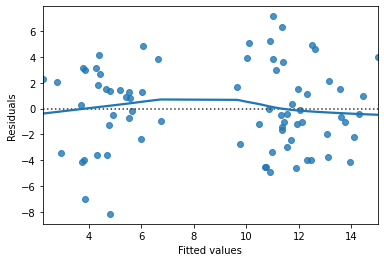

In [22]:
sns.residplot(lmod3.fittedvalues, lmod3.resid, lowess=True)
plt.xlabel("Fitted values")
plt.ylabel("Residuals")
plt.show()

In [23]:
lmod1 = smf.ols('ptsd ~ cpa', sexab).fit()
lmod1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   ptsd   R-squared:                       0.242
Model:                            OLS   Adj. R-squared:                  0.232
Method:                 Least Squares   F-statistic:                     23.67
Date:                Tue, 23 Jun 2020   Prob (F-statistic):           6.27e-06
Time:                        16:59:43   Log-Likelihood:                -218.72
No. Observations:                  76   AIC:                             441.4
Df Residuals:                      74   BIC:                             446.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      6.5523      0.707      9.265      0.000       5.143       7.962
cpa            1.0334      0.212      4.865      0.000       0.610       1.457
==============================================================================
Omnibus:                        0.484   Durbin-Watson:                   1.181
Prob(Omnibus):                  0.785   Jarque-Bera (JB):                0.176
Skew:                           0.103   Prob(JB):                        0.916
Kurtosis:                       3.114   Cond. No.                         4.93
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Interpretation with interaction terms

In [24]:
ws = pd.read_csv("data/whiteside.csv", index_col=0)
ws.head()

,Insul,Temp,Gas
1,Before,-0.8,7.2
2,Before,-0.7,6.9
3,Before,0.4,6.4
4,Before,2.5,6.0
5,Before,2.9,5.8


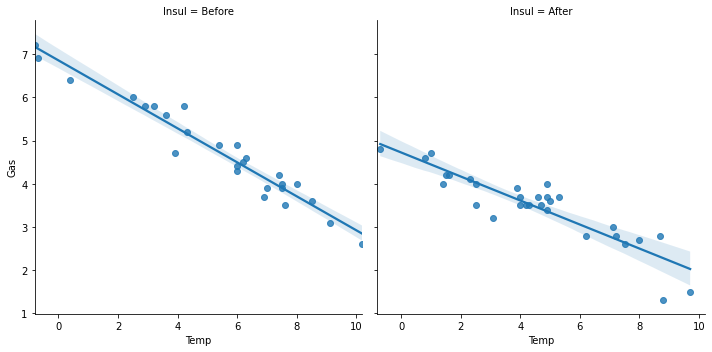

In [25]:
sns.lmplot(x="Temp", y="Gas", col="Insul", data=ws)
plt.show()

In [26]:
lmod = smf.ols('Gas ~ Temp*Insul', ws).fit()
lmod.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    Gas   R-squared:                       0.928
Model:                            OLS   Adj. R-squared:                  0.924
Method:                 Least Squares   F-statistic:                     222.3
Date:                Tue, 23 Jun 2020   Prob (F-statistic):           1.23e-29
Time:                        16:59:44   Log-Likelihood:                -14.100
No. Observations:                  56   AIC:                             36.20
Df Residuals:                      52   BIC:                             44.30
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept                4.7238      0.118     40.000      0.000       4.487       4.961
Insul[T.Before]          2.1300      0.180     11.827      0.000       1.769       2.491
Temp                    -0.2779      0.023    -12.124      0.000      -0.324      -0.232
Temp:Insul[T.Before]    -0.1153      0.032     -3.591      0.001      -0.180      -0.051
==============================================================================
Omnibus:                        6.016   Durbin-Watson:                   1.854
Prob(Omnibus):                  0.049   Jarque-Bera (JB):                4.998
Skew:                          -0.626   Prob(JB):                       0.0822
Kurtosis:                       3.757   Cond. No.                         30.9
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [27]:
ws.Temp.mean()

4.875

In [28]:
ws['cTemp'] = ws.Temp - ws.Temp.mean()
lmod = smf.ols('Gas ~ cTemp*Insul', ws).fit()
lmod.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    Gas   R-squared:                       0.928
Model:                            OLS   Adj. R-squared:                  0.924
Method:                 Least Squares   F-statistic:                     222.3
Date:                Tue, 23 Jun 2020   Prob (F-statistic):           1.23e-29
Time:                        16:59:44   Log-Likelihood:                -14.100
No. Observations:                  56   AIC:                             36.20
Df Residuals:                      52   BIC:                             44.30
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                 3.3689      0.060     56.409      0.000       3.249       3.489
Insul[T.Before]           1.5679      0.088     17.875      0.000       1.392       1.744
cTemp                    -0.2779      0.023    -12.124      0.000      -0.324      -0.232
cTemp:Insul[T.Before]    -0.1153      0.032     -3.591      0.001      -0.180      -0.051
==============================================================================
Omnibus:                        6.016   Durbin-Watson:                   1.854
Prob(Omnibus):                  0.049   Jarque-Bera (JB):                4.998
Skew:                          -0.626   Prob(JB):                       0.0822
Kurtosis:                       3.757   Cond. No.                         7.17
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Factors with more than two levels

In [29]:
ff = pd.read_csv("data/fruitfly.csv", index_col=0)
ff.head()

,thorax,longevity,activity
1,0.68,37,many
2,0.68,49,many
3,0.72,46,many
4,0.72,63,many
5,0.76,39,many


C:\Users\Diogo\Anaconda3\lib\site-packages\seaborn\axisgrid.py:2079: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


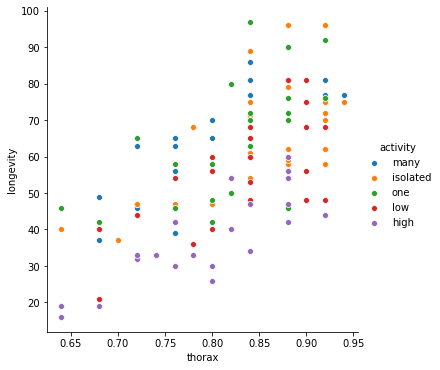

In [30]:
sns.pairplot(x_vars="thorax", y_vars="longevity", data=ff, hue="activity",size=5)
plt.show()

C:\Users\Diogo\Anaconda3\lib\site-packages\seaborn\regression.py:574: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


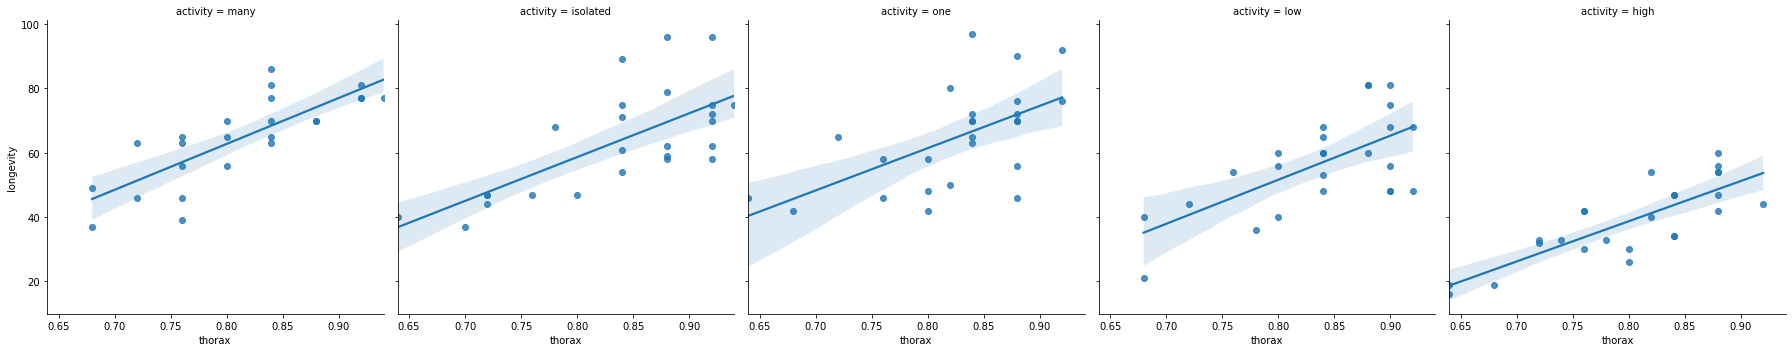

In [31]:
sns.lmplot(x="thorax", y="longevity", data=ff, col="activity",size=5)
plt.show()

Fit the model

In [32]:
lmod = smf.ols('longevity ~ thorax*activity', ff).fit()
lmod.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              longevity   R-squared:                       0.653
Model:                            OLS   Adj. R-squared:                  0.626
Method:                 Least Squares   F-statistic:                     23.88
Date:                Tue, 23 Jun 2020   Prob (F-statistic):           1.89e-22
Time:                        16:59:46   Log-Likelihood:                -464.79
No. Observations:                 124   AIC:                             949.6
Df Residuals:                     114   BIC:                             977.8
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
===============================================================================================
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept                     -61.2800     22.440     -2.731      0.007    -105.734     -16.826
activity[T.isolated]           11.0380     31.287      0.353      0.725     -50.940      73.017
activity[T.low]                 3.2879     34.383      0.096      0.924     -64.824      71.400
activity[T.many]                9.8986     32.961      0.300      0.764     -55.398      75.195
activity[T.one]                17.5552     34.286      0.512      0.610     -50.364      85.475
thorax                        125.0000     27.922      4.477      0.000      69.687     180.313
thorax:activity[T.isolated]    11.1268     38.120      0.292      0.771     -64.389      86.642
thorax:activity[T.low]         12.0011     41.718      0.288      0.774     -70.641      94.643
thorax:activity[T.many]        17.6746     40.686      0.434      0.665     -62.924      98.273
thorax:activity[T.one]          6.4496     41.937      0.154      0.878     -76.627      89.527
==============================================================================
Omnibus:                        2.091   Durbin-Watson:                   1.957
Prob(Omnibus):                  0.352   Jarque-Bera (JB):                1.710
Skew:                           0.281   Prob(JB):                        0.425
Kurtosis:                       3.126   Cond. No.                         127.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Construct and show selected rows of the design matrix (one for each level of activity). DataFrame is just for pretty printing.

In [33]:
mm = patsy.dmatrix('~ thorax*activity', ff)
ii = (1, 25, 49, 75, 99)
pd.DataFrame(mm[ii,:],index=ii,columns=lmod.params.index)

,Intercept,activity[T.isolated],activity[T.low],activity[T.many],activity[T.one],thorax,thorax:activity[T.isolated],thorax:activity[T.low],thorax:activity[T.many],thorax:activity[T.one]
1,1.0,0.0,0.0,1.0,0.0,0.68,0.0,0.00,0.68,0.00
25,1.0,1.0,0.0,0.0,0.0,0.70,0.7,0.00,0.00,0.00
49,1.0,0.0,0.0,0.0,1.0,0.64,0.0,0.00,0.00,0.64
75,1.0,0.0,1.0,0.0,0.0,0.68,0.0,0.68,0.00,0.00
99,1.0,0.0,0.0,0.0,0.0,0.64,0.0,0.00,0.00,0.00


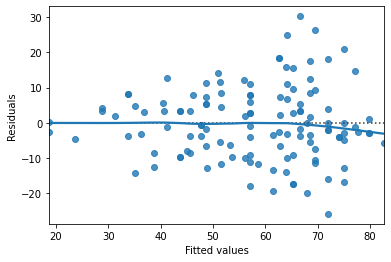

In [34]:
sns.residplot(lmod.fittedvalues, lmod.resid, lowess=True)
plt.xlabel("Fitted values")
plt.ylabel("Residuals")
plt.show()

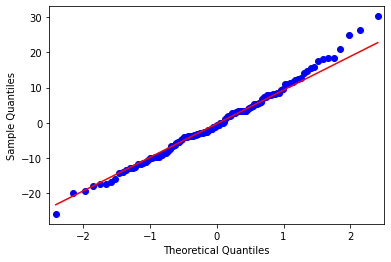

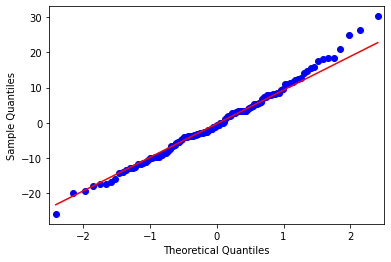

In [35]:
sm.qqplot(lmod.resid, line="q")

In [36]:
sm.stats.anova_lm(lmod)

,df,sum_sq,mean_sq,F,PR(>F)
activity,4.0,12269.467151,3067.366788,26.727833,1.200318e-15
thorax,1.0,12368.420833,12368.420833,107.773577,3.565139e-18
thorax:activity,4.0,24.313592,6.078398,0.052965,9.946914e-01
Residual,114.0,13082.983907,114.763017,NaN,NaN


In [37]:
lmods = smf.ols('longevity ~ thorax+activity', ff).fit()
sm.stats.anova_lm(lmods,lmod)

C:\Users\Diogo\AppData\Roaming\Python\Python37\site-packages\scipy\stats\_distn_infrastructure.py:877: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
C:\Users\Diogo\AppData\Roaming\Python\Python37\site-packages\scipy\stats\_distn_infrastructure.py:877: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
C:\Users\Diogo\AppData\Roaming\Python\Python37\site-packages\scipy\stats\_distn_infrastructure.py:1831: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


,df_resid,ssr,df_diff,ss_diff,F,Pr(>F)
0,118.0,13107.297500,0.0,NaN,NaN,NaN
1,114.0,13082.983907,4.0,24.313592,0.052965,0.994691


In [38]:
lmod = smf.ols('np.log(longevity) ~ thorax+activity', ff).fit()
lmod.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      np.log(longevity)   R-squared:                       0.702
Model:                            OLS   Adj. R-squared:                  0.690
Method:                 Least Squares   F-statistic:                     55.72
Date:                Tue, 23 Jun 2020   Prob (F-statistic):           1.81e-29
Time:                        16:59:46   Log-Likelihood:                 31.033
No. Observations:                 124   AIC:                            -50.07
Df Residuals:                     118   BIC:                            -33.15
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept                1.4250      0.191      7.477      0.000       1.048       1.802
activity[T.isolated]     0.4193      0.055      7.586      0.000       0.310       0.529
activity[T.low]          0.2954      0.055      5.339      0.000       0.186       0.405
activity[T.many]         0.5072      0.055      9.176      0.000       0.398       0.617
activity[T.one]          0.4710      0.055      8.571      0.000       0.362       0.580
thorax                   2.7215      0.233     11.666      0.000       2.259       3.183
==============================================================================
Omnibus:                        2.504   Durbin-Watson:                   1.883
Prob(Omnibus):                  0.286   Jarque-Bera (JB):                2.448
Skew:                          -0.283   Prob(JB):                        0.294
Kurtosis:                       2.609   Cond. No.                         23.5
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

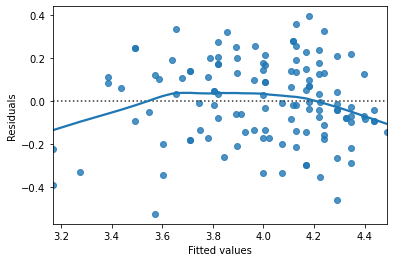

In [39]:
sns.residplot(lmod.fittedvalues, lmod.resid, lowess=True)
plt.xlabel("Fitted values")
plt.ylabel("Residuals")
plt.show()

In [40]:
np.exp(lmod.params[1:5])

activity[T.isolated]    1.520824
activity[T.low]         1.343643
activity[T.many]        1.660571
activity[T.one]         1.601589
dtype: float64

In [41]:
lmod = smf.ols('longevity ~ activity', ff).fit()
lmod.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              longevity   R-squared:                       0.325
Model:                            OLS   Adj. R-squared:                  0.302
Method:                 Least Squares   F-statistic:                     14.33
Date:                Tue, 23 Jun 2020   Prob (F-statistic):           1.41e-09
Time:                        16:59:46   Log-Likelihood:                -506.11
No. Observations:                 124   AIC:                             1022.
Df Residuals:                     119   BIC:                             1036.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept               38.7200      2.926     13.232      0.000      32.926      44.514
activity[T.isolated]    24.8400      4.138      6.002      0.000      16.646      33.034
activity[T.low]         18.0400      4.138      4.359      0.000       9.846      26.234
activity[T.many]        25.8217      4.181      6.175      0.000      17.542      34.101
activity[T.one]         26.0800      4.138      6.302      0.000      17.886      34.274
==============================================================================
Omnibus:                        1.296   Durbin-Watson:                   1.096
Prob(Omnibus):                  0.523   Jarque-Bera (JB):                1.141
Skew:                           0.034   Prob(JB):                        0.565
Kurtosis:                       2.535   Cond. No.                         5.81
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [42]:
sm.stats.anova_lm(lmod)

,df,sum_sq,mean_sq,F,PR(>F)
activity,4.0,12269.467151,3067.366788,14.328022,1.411349e-09
Residual,119.0,25475.718333,214.081667,NaN,NaN


In [43]:
lmod = smf.ols('np.log(longevity) ~ activity', ff).fit()
lmod.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      np.log(longevity)   R-squared:                       0.359
Model:                            OLS   Adj. R-squared:                  0.338
Method:                 Least Squares   F-statistic:                     16.69
Date:                Tue, 23 Jun 2020   Prob (F-statistic):           6.96e-11
Time:                        16:59:46   Log-Likelihood:                -16.520
No. Observations:                 124   AIC:                             43.04
Df Residuals:                     119   BIC:                             57.14
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept                3.6021      0.056     63.822      0.000       3.490       3.714
activity[T.isolated]     0.5172      0.080      6.480      0.000       0.359       0.675
activity[T.low]          0.3977      0.080      4.983      0.000       0.240       0.556
activity[T.many]         0.5412      0.081      6.711      0.000       0.381       0.701
activity[T.one]          0.5407      0.080      6.774      0.000       0.383       0.699
==============================================================================
Omnibus:                       12.042   Durbin-Watson:                   1.036
Prob(Omnibus):                  0.002   Jarque-Bera (JB):               12.531
Skew:                          -0.719   Prob(JB):                      0.00190
Kurtosis:                       3.600   Cond. No.                         5.81
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Factor coding

In [44]:
from patsy.contrasts import Treatment
levels = [1,2,3,4]
contrast = Treatment(reference=0).code_without_intercept(levels)
print(contrast.matrix)

[[0. 0. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]


In [45]:
from patsy.contrasts import Sum
contrast = Sum().code_without_intercept(levels)
print(contrast.matrix)

[[ 1.  0.  0.]
 [ 0.  1.  0.]
 [ 0.  0.  1.]
 [-1. -1. -1.]]


In [46]:
from patsy.contrasts import Helmert
contrast = Helmert().code_without_intercept(levels)
print(contrast.matrix)

[[-1. -1. -1.]
 [ 1. -1. -1.]
 [ 0.  2. -1.]
 [ 0.  0.  3.]]


In [47]:
lmod = smf.ols('ptsd ~ C(csa,Sum)', sexab).fit()
lmod.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   ptsd   R-squared:                       0.519
Model:                            OLS   Adj. R-squared:                  0.513
Method:                 Least Squares   F-statistic:                     79.90
Date:                Tue, 23 Jun 2020   Prob (F-statistic):           2.17e-13
Time:                        16:59:47   Log-Likelihood:                -201.44
No. Observations:                  76   AIC:                             406.9
Df Residuals:                      74   BIC:                             411.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                 8.3185      0.405     20.526      0.000       7.511       9.126
C(csa, Sum)[S.Abused]     3.6226      0.405      8.939      0.000       2.815       4.430
==============================================================================
Omnibus:                        1.200   Durbin-Watson:                   1.830
Prob(Omnibus):                  0.549   Jarque-Bera (JB):                1.206
Skew:                          -0.198   Prob(JB):                        0.547
Kurtosis:                       2.527   Cond. No.                         1.20
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""